# Decisiones Bajo Incertidumbre en las Organizaciones
---
#### Denis Alexander Zuluaga Quintero
dazuluag@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

## Tarea 12 - Regresión lineal en R
---

### Paso 1: Importar y cargar las librerías requeridas

In [33]:
#Importe y cargue aquí las librerías que estime convenientes
#para resolver las preguntas planteadas
library(readxl)

#Configura la impresión de valores numéricos a 50 dígitos
#en caso contrario utiliza notación fija o exponencial
options(scipen = 50)

### Paso 2: Lectura de datos

In [3]:
#Lea los datos del archivo "Baseball Salaries 2011.xlsx" y asígnelos a un objeto
#cuyo nombre sea "datos"
datos <- read_excel("Baseball Salaries 2011.xlsx", sheet = "Salaries 2011")
head(datos)

Player,Team,Position,Salary,Experience
A.J. Burnett,New York Yankees,Pitcher,16500000,2
A.J. Ellis,Los Angeles Dodgers,Catcher,421000,1
A.J. Pierzynski,Chicago White Sox,Catcher,2000000,6
Aaron Cook,Colorado Rockies,Pitcher,9875000,4
Aaron Crow,Kansas City Royals,Pitcher,1400000,14
Aaron Harang,San Diego Padres,Pitcher,3500000,4


In [5]:
#Use la función class para ver qué tipo de objeto es "datos"
class(datos)

[1] "tbl_df"     "tbl"        "data.frame"

In [9]:
#Extraiga las columnas Salary y Experience del objeto datos, y asígnelas como vectores
#a dos objetos nuevos que se llamen Salario y Experiencia
salario <- datos$Salary
experiencia <- datos$Experience

### Paso 3: Cálculo de la estadística básica de las variables cuantitativas del dataframe

In [35]:
#Calcule las estadísticas descriptivas básicas (media, desviación estándar, mediana)
# de las variables Salario y Experiencia, e interprételas en el contexto de los datos.
E <- data.frame(Variable=c("Salario", "Experiencia"), 
                           Media=c(mean(salario), mean(experiencia)), 
                           Desviacion_Estandar=c(sd(salario), sd(experiencia)),
                           Mediana=c(median(salario), median(experiencia)))
E

Variable,Media,Desviacion_Estandar,Mediana
Salario,3305054.674970,4534742.2725920,1175000
Experiencia,12.895611,8.1000875,11


**Salario**: Note como el valor de la mediana esta muy por debajo del valor de la media, lo que indica que se presentan valores atipicos a la derecha de la mediana y permite intuir un sesgo a la derecha en la distribución. Esto significa que la mayor concentración de salarios están alrededor de la mediana, los valores más pequeños y algunos valores son muy grandes y están muy a la derecha. La desviación estándar nos permite confirmar esta afirmación, dado que es un valor muy grande, mucho mayor que la media, evidencia una gran dispersión en los datos de salario. Dado lo anterior se recomienda trabajar con la **mediana** como medida de tendencia central.

**Experiencia**: En este caso vemos que el valor de la media esta muy cerca de la mediana, con una desviación estándar que no indica necesariamente una alta dispersión en los datos; esto significa que la mayor cantidad de valores se encuentran alrededor de la media. Dado que este último valor es mayor que la mediana se presenta un ligero sesgo a la derecha, muy poco significativo. Nos permite concluir que la **media** puede ser una adecuada medida de tendencia central. *Tener en cuenta que la experiencia es una variable cuantitativa discreta y en este caso estudiar la distribución no es necesariamente una opción viable.*

In [37]:
#Cree un dataframe A que tenga las variables Salario y Experiencia
A <- data.frame(Salario=salario, Experiencia=experiencia)
head(A)

Salario,Experiencia
16500000,2
421000,1
2000000,6
9875000,4
1400000,14
3500000,4


In [38]:
#Calcule la matriz de correlaciones entre las variables Salario y Experiencia
cor(A)

,Salario,Experiencia
Salario,1.000000000,0.092974251
Experiencia,0.092974251,1.000000000


*¿Qué indica el valor de la correlación?*

- Nos permite intuir si las variables pueden estar relacionada, es decir, que tanta influencia tiene una variable sobre la otra dado si tienen una tendencia proporcional (la correlación se acerca a 1) o inversamente proporcional (la correlación se acerca a -1).

*¿Tiene sentido pensar que en este caso la experiencia afecta la correlación?*

- No, el valor de la correlación es 0.09 y se aleja por mucho del valor 1 o -1. El valor de correlación debe acercase mucho a estos valores para que pueda existir la probabilidad de que las variables estén relacionadas y luego realizar una prueba (con un método como "Pearson correlation") para determinar si la relación existe o no.

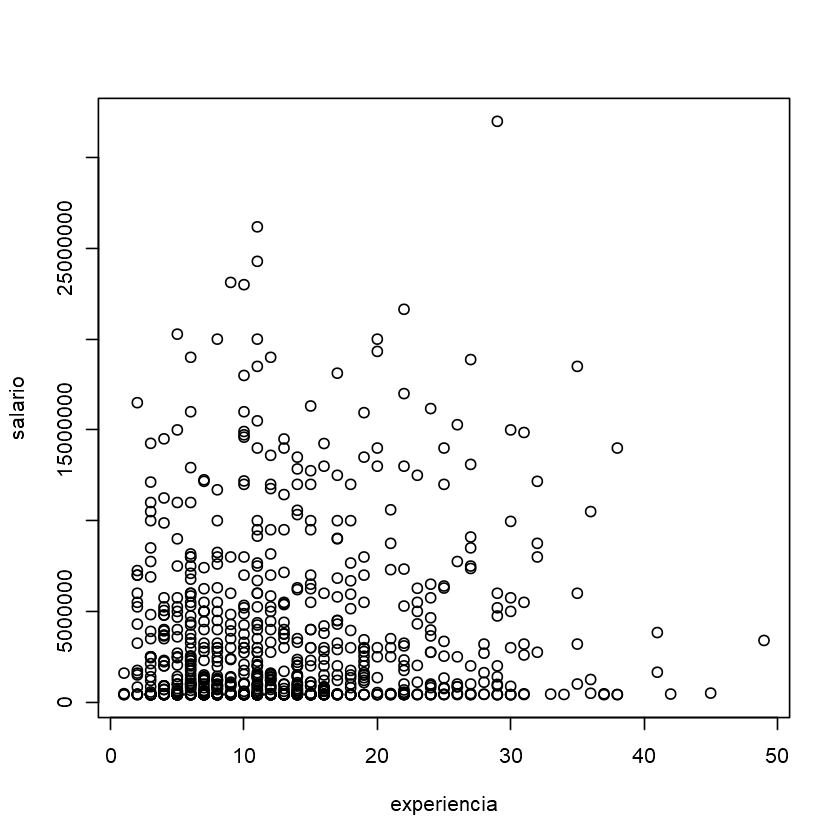

In [59]:
#Cree un diagrama de dispersión con las variables Experiencia (en el eje horizontal)
#y salario en el eje vertical. Use la función #plot. En esta función, el primer
#argumento los los datos del eje horizontal y el segundo argmento son los 
#datos del eje vertical.
plot(x = experiencia, y = salario)

In [60]:
#Ajuste un modelo de regresión lineal del salario en función de la experiencia. Use le
#función lm(Y~X), donde Y es la variable respuesta y X es la variable predictora.
#Asigne los resultados de la regresión a un objeto Reg.
Reg <- lm(salario~experiencia)

#Use la función summary(Reg) para ver las estadísticas básicas del modelo de regresión.
summary(Reg)


Call:
lm(formula = salario ~ experiencia)

Residuals:
     Min       1Q   Median       3Q      Max 
-4476107 -2704272 -2058438  1086239 27856703 

Coefficients:
            Estimate Std. Error t value              Pr(>|t|)    
(Intercept)  2633831     292661  8.9996 < 0.00000000000000022 ***
experiencia    52051      19221  2.7080              0.006907 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4517800 on 841 degrees of freedom
Multiple R-squared:  0.0086442,	Adjusted R-squared:  0.0074654 
F-statistic: 7.3332 on 1 and 841 DF,  p-value: 0.0069068


*¿Cuál es el valor p de la variable experiencia?*

- 0.006907

*¿Qué indica este valor respecto a la significancia de esta variable respecto al salario?*

- Tomando como valor alfa de significancia **0.001**, el valor p dado para experiencia indica que se acepta la hipotesis nula la cual indica que la variable predictora no tiene efecto en la variable de respuesta. Por lo tanto, podemos afirmar que *experiencia*, variable predictora, es probable que **NO** tenga una adición significativa al modelo dado que cambios en este valor **NO** están relaciondos a cambios en la variable de respuesta (*salario*).

In [47]:
#Extraiga los coeficientes del modelo de regresión (intercepto y pendiente).
#Por ejemplo, para B0 (intercepto) sería Reg$coefficients[1] y para B1 (pendiente)
#sería B1=Reg$coefficients[2]
B0 <- Reg$coefficients[1]
B1 <- Reg$coefficients[2]

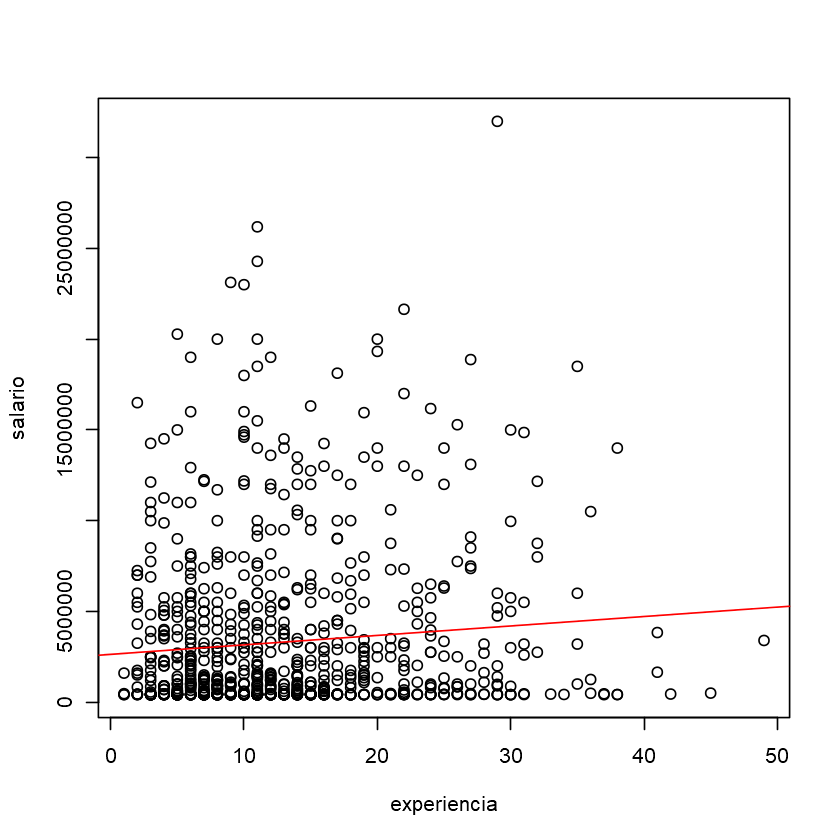

In [51]:
#Haga un nuevo gráfico de dispersión de los salarios y la experiencia
#con la recta ajustada por el modelo de regresión.
plot(x = experiencia, y = salario)
abline(Reg, col = "red")

In [61]:
#Use la función anova() para mostrar la Tabla ANOVA de la regresión. 
anova(Reg)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
experiencia,1,149672733466110,149672733466110,7.3331713,0.0069067982
Residuals,841,17165120523711052,20410369231523,NA,NA


*¿Es significativa la regresión?*

- El valor p nos esta diciendo nuevamente que no es probable que cambios en la variable predictora *experiencia* produzca cambios en la variable de respuesta *salario*. Lo confirma el valor F el cual, al ser muy pequeño, indica que las diferencias entre las medias de las categorías de *experiencia* es baja y por tanto podemos intuir que la variable predictora no esta relacionada con la variable de respuesta *salario*. **Concluímos que la regresión no es significativa.** Igualmente lo podemos observar en la gráfica de dispersión con la línea ajustada.

*Compare el valor p de esta prueba con el valor de la prueba individual de significancia de la variable Experiencia:*

- En la tabla ANOVA presenta el mismo valor p que resultó del summary sobre la regresión lineal: 0.006907